In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
plt.style.use('seaborn-whitegrid')

In [64]:
csv_path = Path('SMA_Analysis/Stocks/ABBV.csv')
abbv_df=pd.read_csv(csv_path)

In [65]:
abbv_df = abbv_df.set_index(pd.DatetimeIndex(abbv_df['Date'].values))
abbv_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
2016-01-21,2016-01-21,45.215070,46.383132,44.923052,46.059547,12097000,0.0,0
2016-01-22,2016-01-22,46.643578,46.904026,45.633363,46.430489,10383800,0.0,0
2016-01-25,2016-01-25,46.588335,47.203938,45.917489,46.288429,9681900,0.0,0
2016-01-26,2016-01-26,46.572560,46.777762,45.151944,45.980637,7421100,0.0,0
2016-01-27,2016-01-27,46.059557,46.509418,44.552124,45.073017,9077700,0.0,0


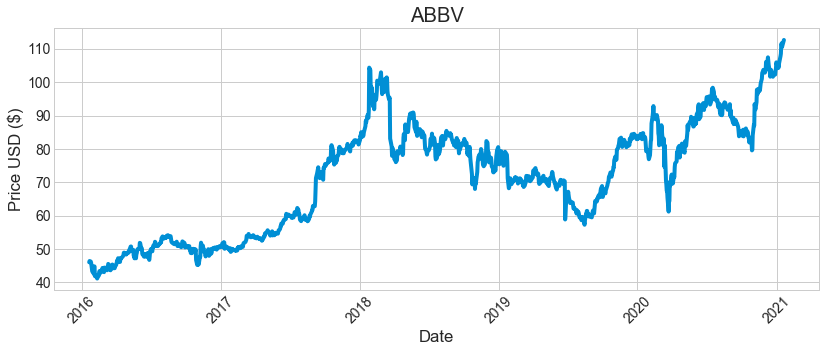

In [69]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(abbv_df['Close'], label= 'Close')
plt.xticks(rotation=45)
plt.title('ABBV')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

In [70]:
#Calculate MACD and Signal line indicators
#Calcualte short term exponential moving average (EMA)
ShortEMA = abbv_df.Close.ewm(span=12, adjust=False).mean()
#Calculate the long term EMA
LongEMA = abbv_df.Close.ewm(span=26, adjust=False).mean()
#Calculate MACD
MACD = ShortEMA - LongEMA
#calculate signal line
signal = MACD.ewm(span=9, adjust=False).mean()

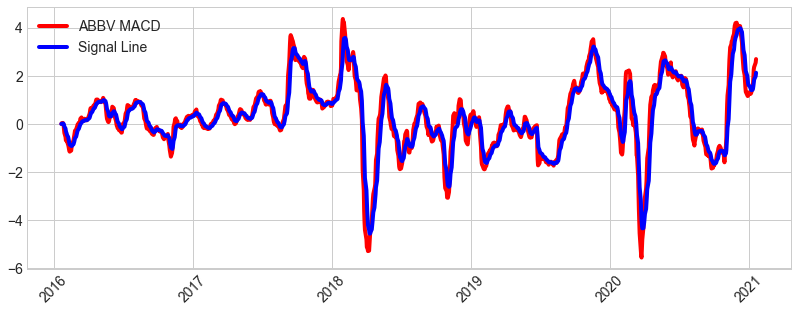

In [71]:
#plot the chart
plt.figure(figsize=(12.2,4.5))
plt.plot(abbv_df.index, MACD, label = 'ABBV MACD', color = 'red')
plt.plot(abbv_df.index, signal, label='Signal Line', color = 'blue')
plt.xticks(rotation = 45)
plt.legend(loc='upper left')
plt.show()

In [72]:
#create new columns for data
abbv_df['MACD'] = MACD
abbv_df['Signal Line'] = signal
#show the data
abbv_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD,Signal Line
2016-01-21,2016-01-21,45.215070,46.383132,44.923052,46.059547,12097000,0.0,0,0.000000,0.000000
2016-01-22,2016-01-22,46.643578,46.904026,45.633363,46.430489,10383800,0.0,0,0.029591,0.005918
2016-01-25,2016-01-25,46.588335,47.203938,45.917489,46.288429,9681900,0.0,0,0.041105,0.012955
2016-01-26,2016-01-26,46.572560,46.777762,45.151944,45.980637,7421100,0.0,0,0.025104,0.015385
2016-01-27,2016-01-27,46.059557,46.509418,44.552124,45.073017,9077700,0.0,0,-0.060121,0.000284


In [13]:
#create function to signal when to buy and sell 
def buy_sell(signal):
    Buy = []
    Sell = []
    flag = -1
    
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:
            Sell.append(np.nan)
            if flag != 1:
                Buy.append(signal['Close'][i])
                flag = 1
            else:
                Buy.append(np.nan)
        elif signal['MACD'][i] < signal['Signal Line'][i]:
            Buy.append(np.nan)
            if flag != 0:
                Sell.append(signal['Close'][i])
                flag = 0
            else:
                Sell.append(np.nan)
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)
    return (Buy, Sell)
    

In [14]:
#Create buy and sell column
a = buy_sell(abbv_df)
abbv_df['Buy_Signal_Price'] = a[0]
abbv_df['Sell_Signal_Price'] = a[1]

In [15]:
#show data
abbv_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2016-01-21,2016-01-21,45.215070,46.383132,44.923052,46.059547,12097000,0.0,0,0.000000,0.000000,NaN,NaN
2016-01-22,2016-01-22,46.643578,46.904026,45.633363,46.430489,10383800,0.0,0,0.029591,0.005918,46.430489,NaN
2016-01-25,2016-01-25,46.588335,47.203938,45.917489,46.288429,9681900,0.0,0,0.041105,0.012955,NaN,NaN
2016-01-26,2016-01-26,46.572560,46.777762,45.151944,45.980637,7421100,0.0,0,0.025104,0.015385,NaN,NaN
2016-01-27,2016-01-27,46.059557,46.509418,44.552124,45.073017,9077700,0.0,0,-0.060121,0.000284,NaN,45.073017


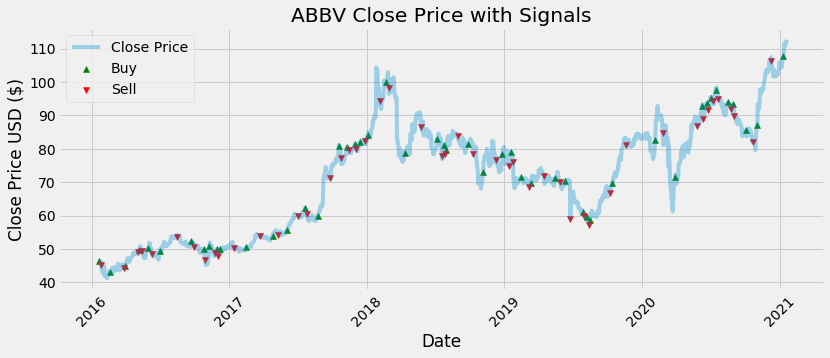

In [16]:
#Show buy an sell signals
plt.figure(figsize=(12.2,4.5))
plt.scatter(abbv_df.index, abbv_df['Buy_Signal_Price'], color='green', label = 'Buy', marker = '^', alpha = 1)
plt.scatter(abbv_df.index, abbv_df['Sell_Signal_Price'], color='red', label = 'Sell', marker = 'v', alpha = 1)
plt.plot(abbv_df['Close'], label='Close Price', alpha = 0.35)
plt.title('ABBV Close Price with Signals')
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()

In [17]:
csv_path = Path('SMA_Analysis/Stocks/BAC.csv')
abbv_df=pd.read_csv(csv_path)

In [28]:
bac_df = bac_df.set_index(pd.DatetimeIndex(bac_df['Date'].values))
bac_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD,Signal Line
2016-01-21,2016-01-21,12.389099,12.543169,12.008453,12.108146,188976000,0.0,0,0.000000,0.000000
2016-01-22,2016-01-22,12.370972,12.434413,12.207839,12.289406,169999800,0.0,0,0.014459,0.002892
2016-01-25,2016-01-25,12.271279,12.280343,11.727500,11.745626,186419100,0.0,0,-0.017755,-0.001237
2016-01-26,2016-01-26,11.845318,12.099082,11.818129,12.062830,124246900,0.0,0,-0.017488,-0.004488
2016-01-27,2016-01-27,11.963138,12.443476,11.954075,12.108146,124095800,0.0,0,-0.013465,-0.006283


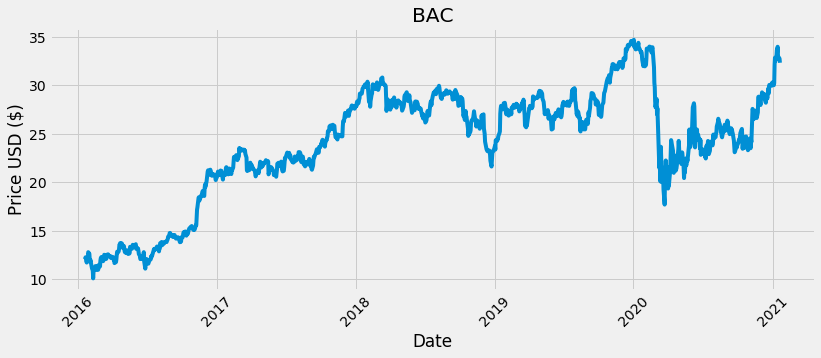

In [29]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(bac_df['Close'], label= 'Close')
plt.xticks(rotation=45)
plt.title('BAC')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

In [30]:
#Calculate MACD and Signal line indicators
#Calcualte short term exponential moving average (EMA)
ShortEMA = bac_df.Close.ewm(span=12, adjust=False).mean()
#Calculate the long term EMA
LongEMA = bac_df.Close.ewm(span=26, adjust=False).mean()
#Calculate MACD
MACD = ShortEMA - LongEMA
#calculate signal line
signal = MACD.ewm(span=9, adjust=False).mean()

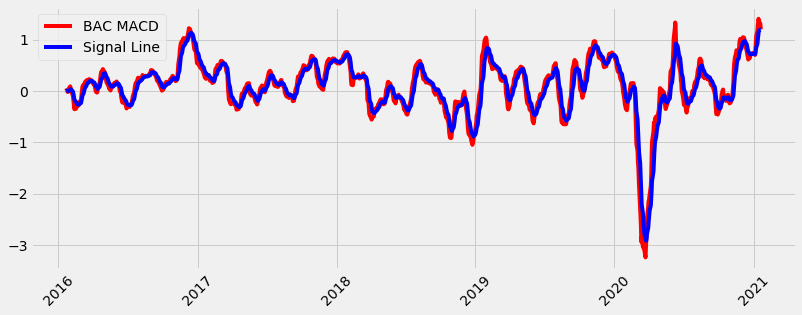

In [39]:
#plot the chart
plt.figure(figsize=(12.2,4.5))
plt.plot(bac_df.index, MACD, label = 'BAC MACD', color = 'red')
plt.plot(bac_df.index, signal, label='Signal Line', color = 'blue')
plt.xticks(rotation = 45)
plt.legend(loc='upper left')
plt.show()

In [40]:
#create new columns for data
bac_df['MACD'] = MACD
bac_df['Signal Line'] = signal
#show the data
bac_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2016-01-21,2016-01-21,12.389099,12.543169,12.008453,12.108146,188976000,0.0,0,0.000000,0.000000,NaN,NaN
2016-01-22,2016-01-22,12.370972,12.434413,12.207839,12.289406,169999800,0.0,0,0.014459,0.002892,12.289406,NaN
2016-01-25,2016-01-25,12.271279,12.280343,11.727500,11.745626,186419100,0.0,0,-0.017755,-0.001237,NaN,11.745626
2016-01-26,2016-01-26,11.845318,12.099082,11.818129,12.062830,124246900,0.0,0,-0.017488,-0.004488,NaN,NaN
2016-01-27,2016-01-27,11.963138,12.443476,11.954075,12.108146,124095800,0.0,0,-0.013465,-0.006283,NaN,NaN


In [41]:
#create function to signal when to buy and sell 
def buy_sell(signal):
    Buy = []
    Sell = []
    flag = -1
    
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:
            Sell.append(np.nan)
            if flag != 1:
                Buy.append(signal['Close'][i])
                flag = 1
            else:
                Buy.append(np.nan)
        elif signal['MACD'][i] < signal['Signal Line'][i]:
            Buy.append(np.nan)
            if flag != 0:
                Sell.append(signal['Close'][i])
                flag = 0
            else:
                Sell.append(np.nan)
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)
    return (Buy, Sell)
    

In [42]:
#Create buy and sell column
a = buy_sell(bac_df)
bac_df['Buy_Signal_Price'] = a[0]
bac_df['Sell_Signal_Price'] = a[1]

In [43]:
#show data
bac_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2016-01-21,2016-01-21,12.389099,12.543169,12.008453,12.108146,188976000,0.0,0,0.000000,0.000000,NaN,NaN
2016-01-22,2016-01-22,12.370972,12.434413,12.207839,12.289406,169999800,0.0,0,0.014459,0.002892,12.289406,NaN
2016-01-25,2016-01-25,12.271279,12.280343,11.727500,11.745626,186419100,0.0,0,-0.017755,-0.001237,NaN,11.745626
2016-01-26,2016-01-26,11.845318,12.099082,11.818129,12.062830,124246900,0.0,0,-0.017488,-0.004488,NaN,NaN
2016-01-27,2016-01-27,11.963138,12.443476,11.954075,12.108146,124095800,0.0,0,-0.013465,-0.006283,NaN,NaN


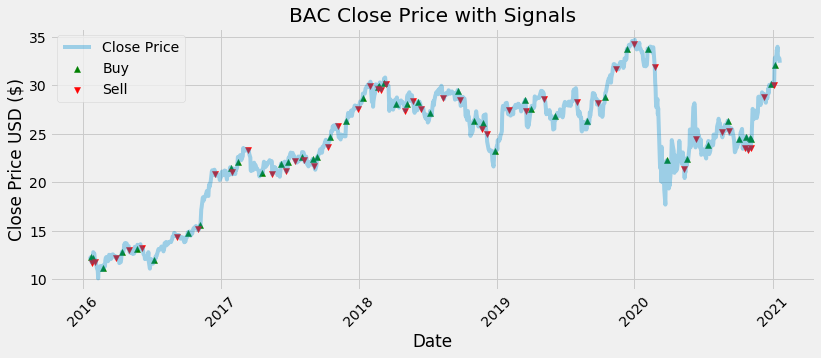

In [44]:
#Show buy an sell signals
plt.figure(figsize=(12.2,4.5))
plt.scatter(bac_df.index, bac_df['Buy_Signal_Price'], color='green', label = 'Buy', marker = '^', alpha = 1)
plt.scatter(bac_df.index, bac_df['Sell_Signal_Price'], color='red', label = 'Sell', marker = 'v', alpha = 1)
plt.plot(bac_df['Close'], label='Close Price', alpha = 0.35)
plt.title('BAC Close Price with Signals')
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()

In [47]:
csv_path = Path('SMA_Analysis/Stocks/CVX.csv')
cvx_df=pd.read_csv(csv_path)

In [48]:
cvx_df = bac_df.set_index(pd.DatetimeIndex(cvx_df['Date'].values))
cvx_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2016-01-21,2016-01-21,12.389099,12.543169,12.008453,12.108146,188976000,0.0,0,0.000000,0.000000,NaN,NaN
2016-01-22,2016-01-22,12.370972,12.434413,12.207839,12.289406,169999800,0.0,0,0.014459,0.002892,12.289406,NaN
2016-01-25,2016-01-25,12.271279,12.280343,11.727500,11.745626,186419100,0.0,0,-0.017755,-0.001237,NaN,11.745626
2016-01-26,2016-01-26,11.845318,12.099082,11.818129,12.062830,124246900,0.0,0,-0.017488,-0.004488,NaN,NaN
2016-01-27,2016-01-27,11.963138,12.443476,11.954075,12.108146,124095800,0.0,0,-0.013465,-0.006283,NaN,NaN


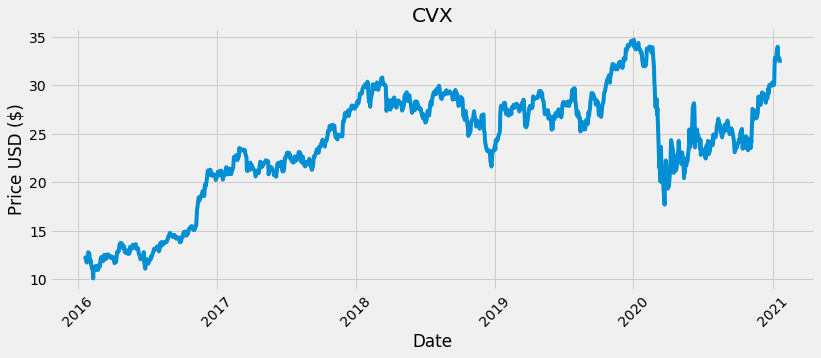

In [49]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(cvx_df['Close'], label= 'Close')
plt.xticks(rotation=45)
plt.title('CVX')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

In [50]:
#Calculate MACD and Signal line indicators
#Calcualte short term exponential moving average (EMA)
ShortEMA = cvx_df.Close.ewm(span=12, adjust=False).mean()
#Calculate the long term EMA
LongEMA = cvx_df.Close.ewm(span=26, adjust=False).mean()
#Calculate MACD
MACD = ShortEMA - LongEMA
#calculate signal line
signal = MACD.ewm(span=9, adjust=False).mean()

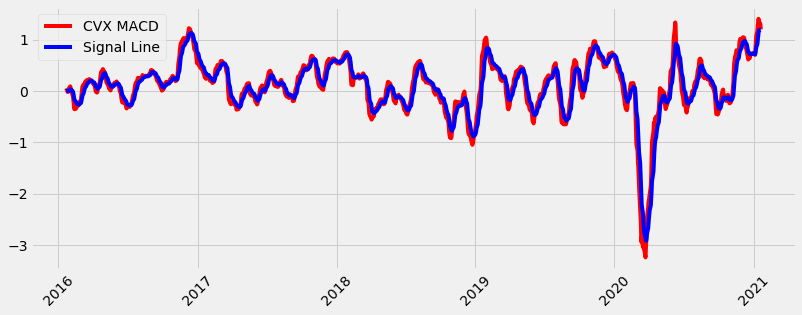

In [51]:
#plot the chart
plt.figure(figsize=(12.2,4.5))
plt.plot(cvx_df.index, MACD, label = 'CVX MACD', color = 'red')
plt.plot(cvx_df.index, signal, label='Signal Line', color = 'blue')
plt.xticks(rotation = 45)
plt.legend(loc='upper left')
plt.show()

In [52]:
#create new columns for data
cvx_df['MACD'] = MACD
cvx_df['Signal Line'] = signal
#show the data
cvx_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2016-01-21,2016-01-21,12.389099,12.543169,12.008453,12.108146,188976000,0.0,0,0.000000,0.000000,NaN,NaN
2016-01-22,2016-01-22,12.370972,12.434413,12.207839,12.289406,169999800,0.0,0,0.014459,0.002892,12.289406,NaN
2016-01-25,2016-01-25,12.271279,12.280343,11.727500,11.745626,186419100,0.0,0,-0.017755,-0.001237,NaN,11.745626
2016-01-26,2016-01-26,11.845318,12.099082,11.818129,12.062830,124246900,0.0,0,-0.017488,-0.004488,NaN,NaN
2016-01-27,2016-01-27,11.963138,12.443476,11.954075,12.108146,124095800,0.0,0,-0.013465,-0.006283,NaN,NaN


In [53]:
#create function to signal when to buy and sell 
def buy_sell(signal):
    Buy = []
    Sell = []
    flag = -1
    
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:
            Sell.append(np.nan)
            if flag != 1:
                Buy.append(signal['Close'][i])
                flag = 1
            else:
                Buy.append(np.nan)
        elif signal['MACD'][i] < signal['Signal Line'][i]:
            Buy.append(np.nan)
            if flag != 0:
                Sell.append(signal['Close'][i])
                flag = 0
            else:
                Sell.append(np.nan)
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)
    return (Buy, Sell)
    

In [54]:
#Create buy and sell column
a = buy_sell(cvx_df)
cvx_df['Buy_Signal_Price'] = a[0]
cvx_df['Sell_Signal_Price'] = a[1]

In [55]:
#show data
cvx_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2016-01-21,2016-01-21,12.389099,12.543169,12.008453,12.108146,188976000,0.0,0,0.000000,0.000000,NaN,NaN
2016-01-22,2016-01-22,12.370972,12.434413,12.207839,12.289406,169999800,0.0,0,0.014459,0.002892,12.289406,NaN
2016-01-25,2016-01-25,12.271279,12.280343,11.727500,11.745626,186419100,0.0,0,-0.017755,-0.001237,NaN,11.745626
2016-01-26,2016-01-26,11.845318,12.099082,11.818129,12.062830,124246900,0.0,0,-0.017488,-0.004488,NaN,NaN
2016-01-27,2016-01-27,11.963138,12.443476,11.954075,12.108146,124095800,0.0,0,-0.013465,-0.006283,NaN,NaN


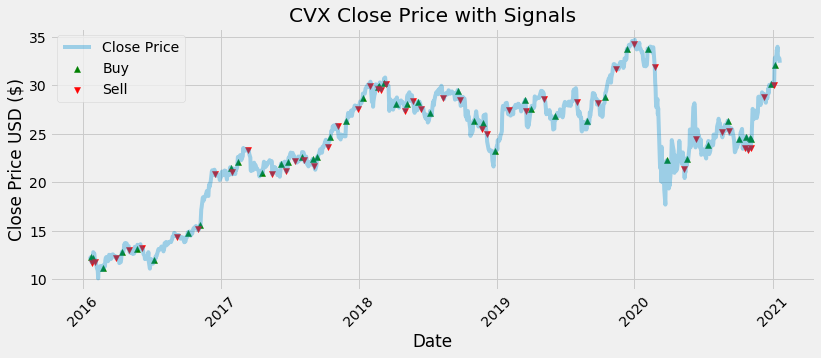

In [56]:
#Show buy an sell signals
plt.figure(figsize=(12.2,4.5))
plt.scatter(cvx_df.index, cvx_df['Buy_Signal_Price'], color='green', label = 'Buy', marker = '^', alpha = 1)
plt.scatter(cvx_df.index, cvx_df['Sell_Signal_Price'], color='red', label = 'Sell', marker = 'v', alpha = 1)
plt.plot(cvx_df['Close'], label='Close Price', alpha = 0.35)
plt.title('CVX Close Price with Signals')
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()